# DFT频谱泄露, 加窗, 窗函数的选择和比较

In [1]:
# import stuff
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from IPython.display import Image

This document introduces what spectral leakage in DFT is, and how windowing can be used to mitigate it. It then discusses how to select the appropriate window to use, and demonstrates the effects of using different windows on a certain signal. 

### Spectral leakage in DFT

Spectral leakage happens whenever we introduce new frequencies during signal processing. It is quite often the case when DFT is used, but we specifically denote leakage in DFT as the addition of new frequencies caused by truncation, or application of rectangular window function. We will show why this is a problem with a toy example. 

Let's start by visualizing a signal in the form of $s(t) = 3sin(3 \cdot 2\pi t) + 2cos(2.5 \cdot 2\pi t)$, with respective frequencie components 2.5 Hz and 3 Hz (let's say this is our full signal): 

(0, 5)

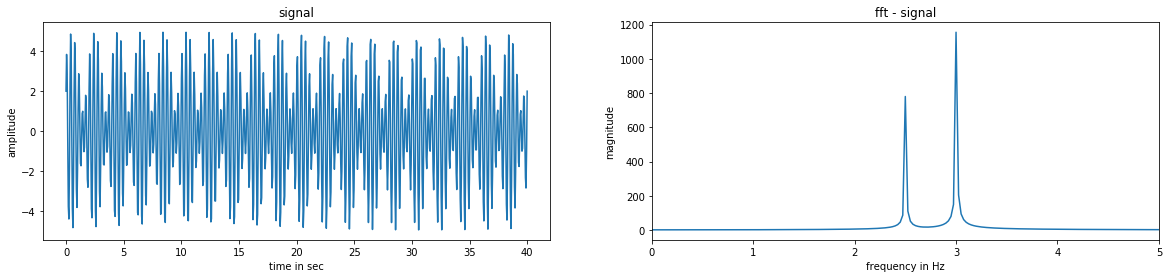

In [2]:
# set signal
f_s = 20
t = np.linspace(0, 40, 800)
x = 3 * np.sin(2 * np.pi * 3 * t) + 2 * np.cos(2 * np.pi * 2.5 * t)

# run fft
X = fftpack.fft(x)
X_new = X[0 : len(x)//2]
freqs = fftpack.fftfreq(len(x)) * f_s
freqs_new = freqs[0 : len(x)//2]

# show results
f, ax = plt.subplots(1, 2, figsize=(20, 4))

ax[0].set_title("signal")
ax[0].set_xlabel("time in sec")
ax[0].set_ylabel("amplitude")
ax[0].plot(t, x)

ax[1].set_title("fft - signal")
ax[1].set_xlabel("frequency in Hz")
ax[1].set_ylabel("magnitude")
ax[1].plot(freqs_new, abs(X_new))
ax[1].set_xlim(0, 5)

We can see that there are two peaks in our frequency spectrum corresponding to the frequencies at 2.5 Hz and 3 Hz. 

Let's now consider the case where we have only a segment of the signal (equivalent to selecting a rectanglular window of width 60), reducing the duration of our segment to 3 seconds:

(0, 5)

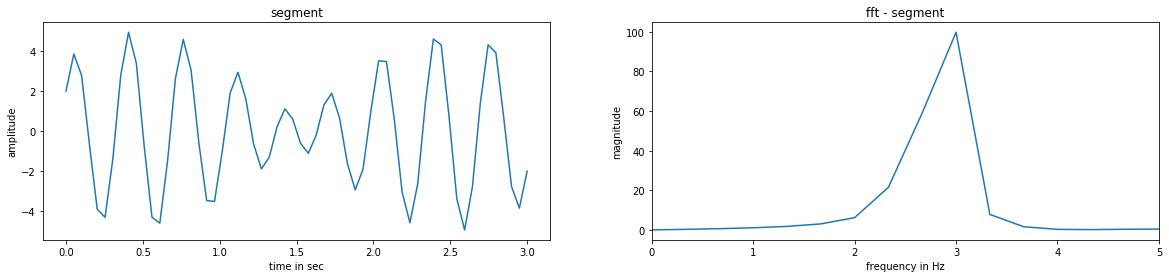

In [3]:
# set signal
f_s = 20
t = np.linspace(0, 3, 60)
x = 3 * np.sin(2 * np.pi * 3 * t) + 2 * np.cos(2 * np.pi * 2.5 * t)

# run fft
X = fftpack.fft(x)
X_new = X[0 : len(x)//2]
freqs = fftpack.fftfreq(len(x)) * f_s
freqs_new = freqs[0 : len(x)//2]

# show results
f, ax = plt.subplots(1, 2, figsize=(20, 4))

ax[0].set_title("segment")
ax[0].set_xlabel("time in sec")
ax[0].set_ylabel("amplitude")
ax[0].plot(t, x)

ax[1].set_title("fft - segment")
ax[1].set_xlabel("frequency in Hz")
ax[1].set_ylabel("magnitude")
ax[1].plot(freqs_new, abs(X_new))
ax[1].set_xlim(0, 5)

It's clear from the above graph that the peak at 2.5 Hz vanishes. This is because DFT assumes periodic continuation of the truncated signal, and not having a segment consisting of full periods causes frequency to "leak" from peaks to surronding frequencies. In this case, the peak at 2.5 Hz becomes indistinguishable from leakage from the peak at 3 Hz, which causes problems if our goal is to have them separated. 

### Windowing

A technique called windowing is commonly used to mitigate leakage in DFT caused by truncation. The general idea is to multiply, or convolve, the signal segment with a function, forcing it to tend to 0 at its endpoints while reserving its old values near its center. This eliminates aperiodicity. 

We will use a Hann window on the above segment to demonstrate the effect:

(0, 5)

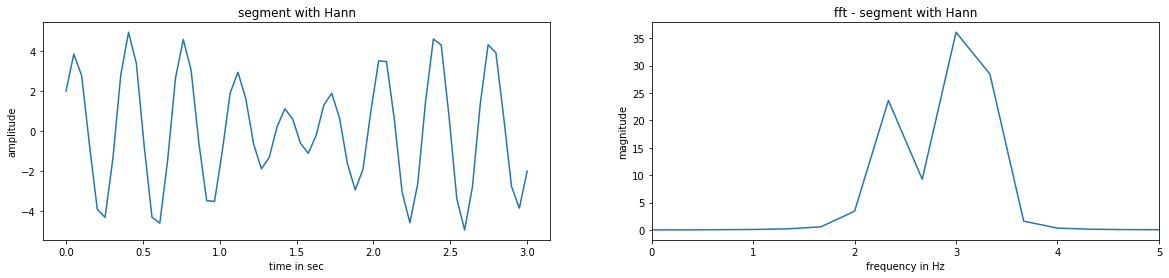

In [4]:
# set signal
f_s = 20
t = np.linspace(0, 3, 60)
x = 3 * np.sin(2 * np.pi * 3 * t) + 2 * np.cos(2 * np.pi * 2.5 * t)

# hann
w = np.hanning(len(t))

# run fft
X = fftpack.fft(x*w)
X_new = X[0 : len(x)//2]
freqs = fftpack.fftfreq(len(x)) * f_s
freqs_new = freqs[0 : len(x)//2]

# show results
f, ax = plt.subplots(1, 2, figsize=(20, 4))

ax[0].set_title("segment with Hann")
ax[0].set_xlabel("time in sec")
ax[0].set_ylabel("amplitude")
ax[0].plot(t, x)

ax[1].set_title("fft - segment with Hann")
ax[1].set_xlabel("frequency in Hz")
ax[1].set_ylabel("magnitude")
ax[1].plot(freqs_new, abs(X_new))
ax[1].set_xlim(0, 5)

The peak at 2.5 Hz is now distinguishable from the peak at 3 Hz after replacing the rectangular window with the Hann window. 

### Selecting window functions

It's helpful to understand some characteristics of a window function in its frequency response for selecting the appropriate window:

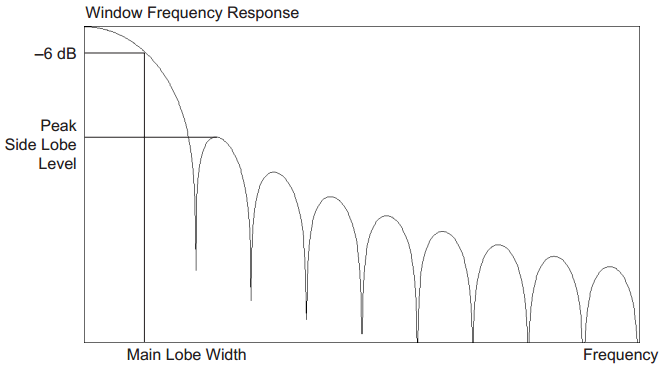

In [5]:
Image(filename='dft_pic/lobes.png')

Main lobe width of the window limits the frequency resolution of the windowed signal, so the ability to distinguish two closely spaced frequency components increases as the main lobe of the smoothing window narrows. Side lobe characteristics of the window affect the extent to which frequency components leak into adjacent frequency bins. 

A plot of frequency responses of common window functions is included below: 

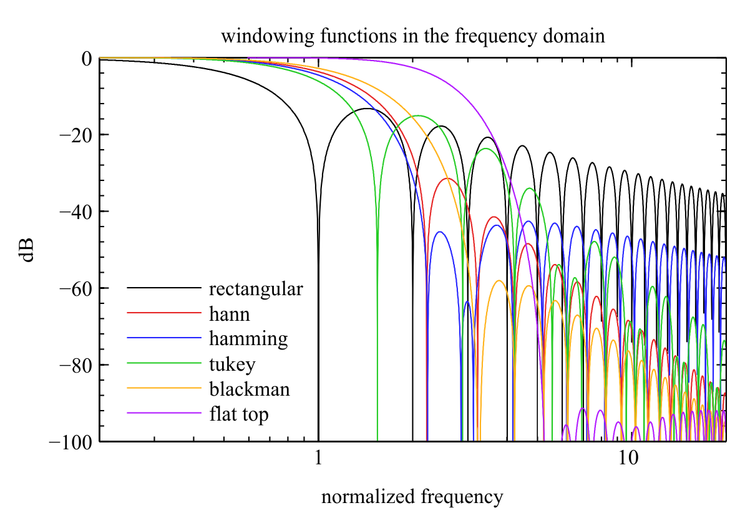

In [6]:
Image(filename='dft_pic/windows.png')

### Demo

In the last part of this document, we will compare the smoothing effects of different window functions on a segment of a signal of form $s(t) = 7 sin(180 \cdot 2\pi t) + 2.8 sin(390 \cdot 2\pi t) + 5.1 sin(600 \cdot 2\pi t)$, with sampling frequency 2048 Hz and duration 0.5 second:

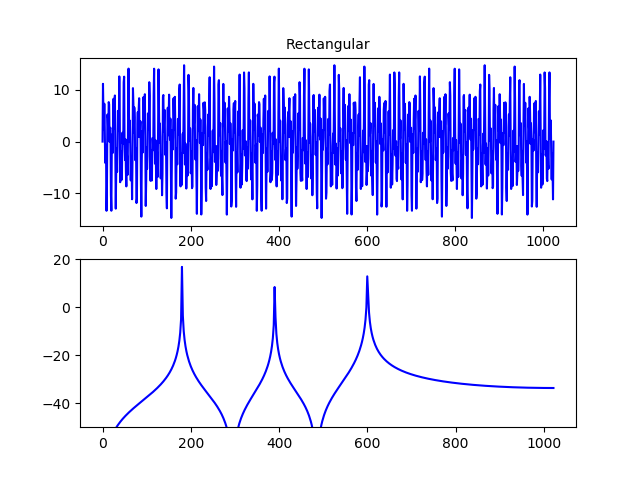

In [7]:
Image(filename='dft_pic/rec.png')

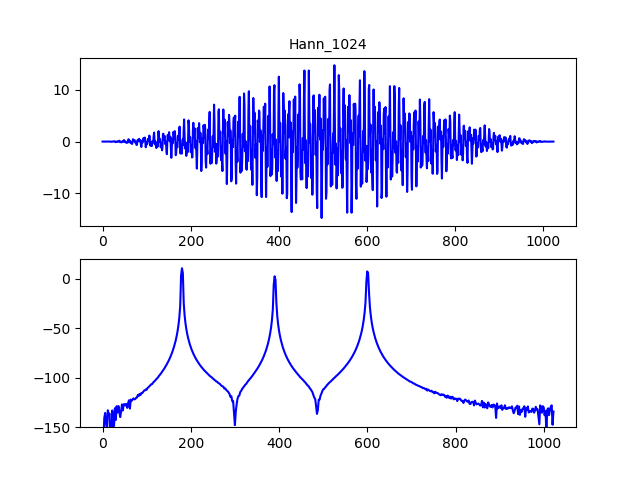

In [8]:
Image(filename='dft_pic/hann.png')

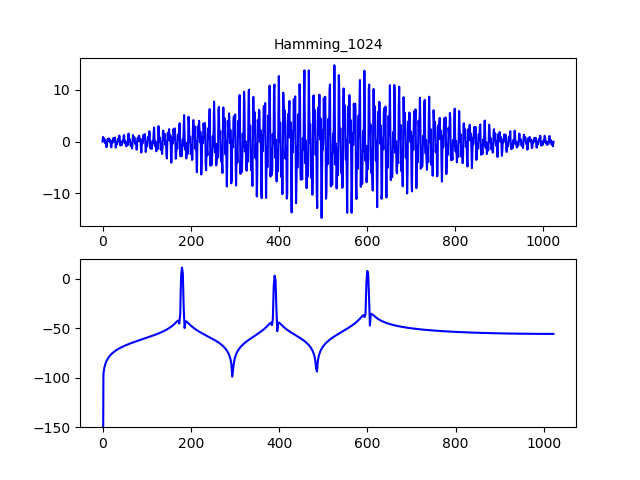

In [9]:
Image(filename='dft_pic/hamming.png')

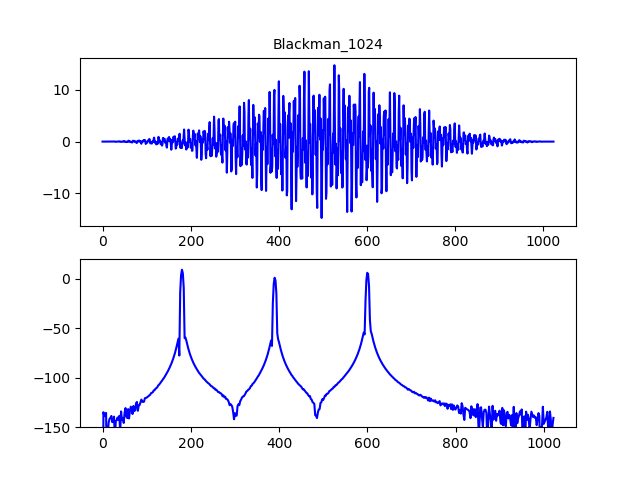

In [10]:
Image(filename='dft_pic/blackman.png')

The following are results of applying three different Chebyshev windows, with sidelobe magnitude being 60, 80, and 100 dB below the mainlobe magnitude: 

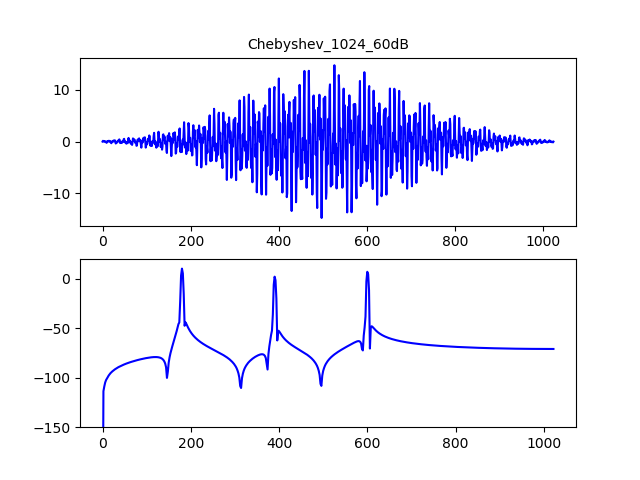

In [11]:
Image(filename='dft_pic/cheby60.png')

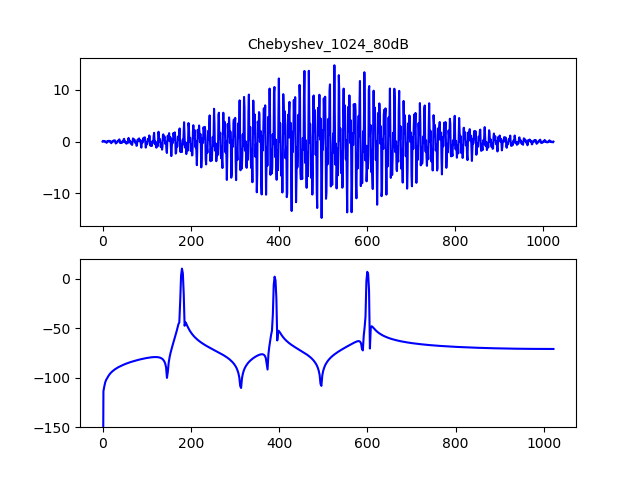

In [12]:
Image(filename='dft_pic/cheby80.png')

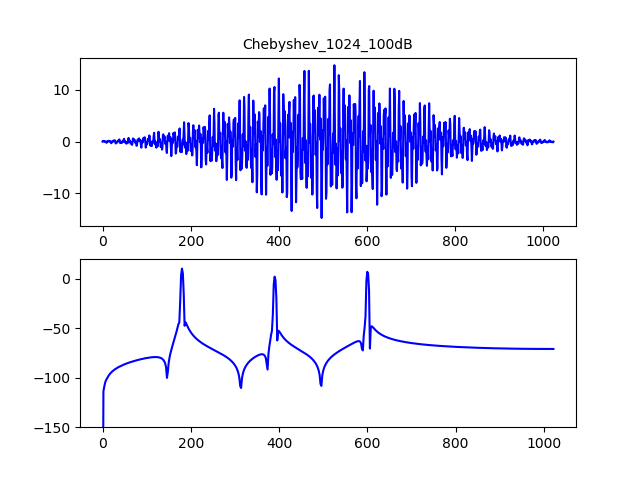

In [13]:
Image(filename='dft_pic/cheby100.png')

Frequency responses (where peak side lobe ratios are specified) of these window functions are included below: 

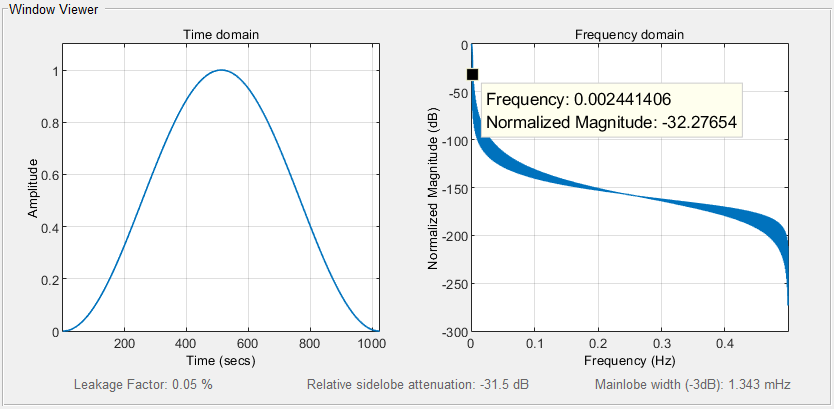

In [14]:
Image(filename='dft_pic/fr_hann.png')

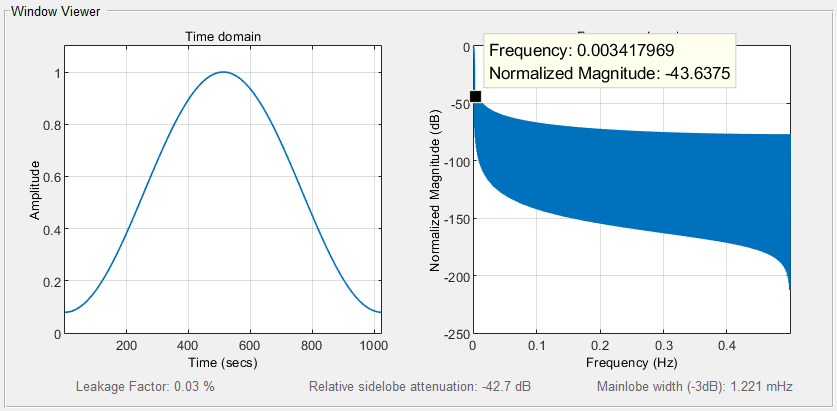

In [15]:
Image(filename='dft_pic/fr_hamming.png')

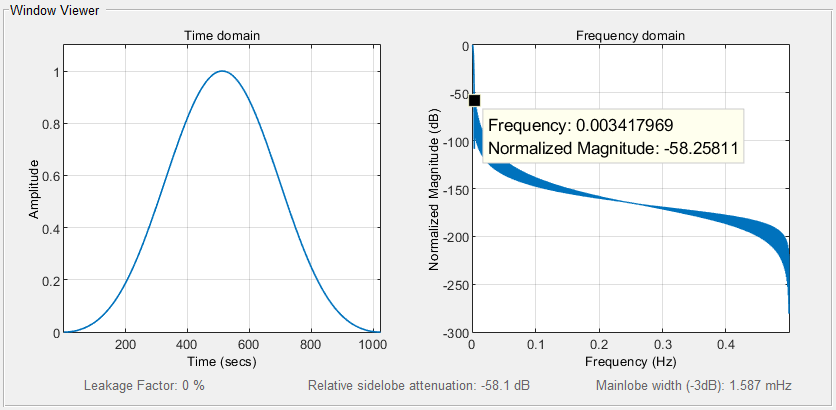

In [16]:
Image(filename='dft_pic/fr_blackman.png')

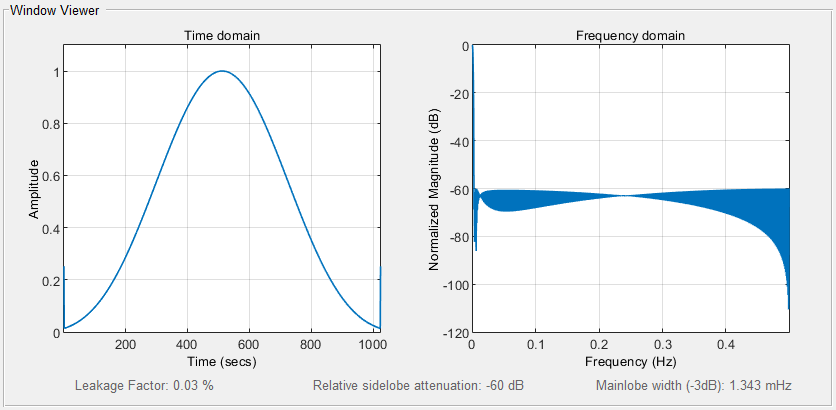

In [17]:
Image(filename='dft_pic/fr_cheby60.png')

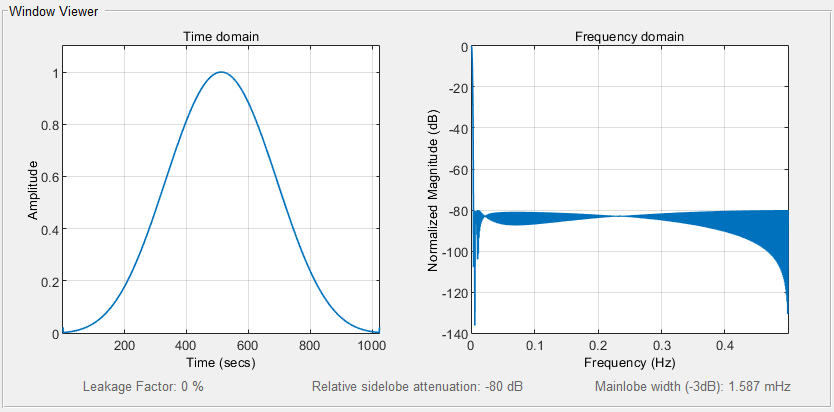

In [18]:
Image(filename='dft_pic/fr_cheby80.png')

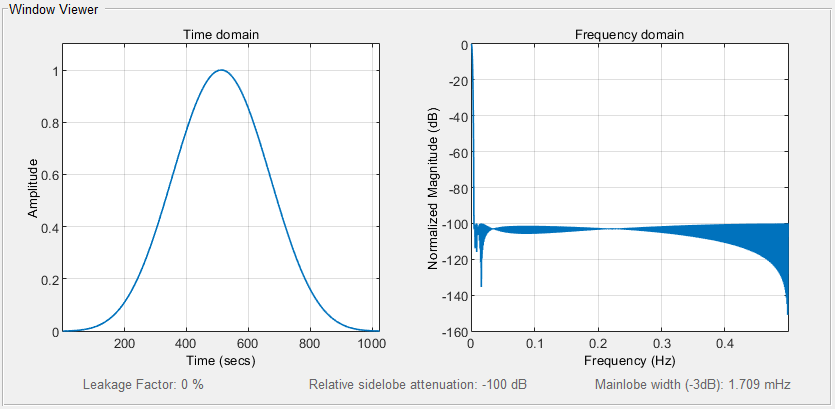

In [19]:
Image(filename='dft_pic/fr_cheby100.png')

We include the following information for completeness:

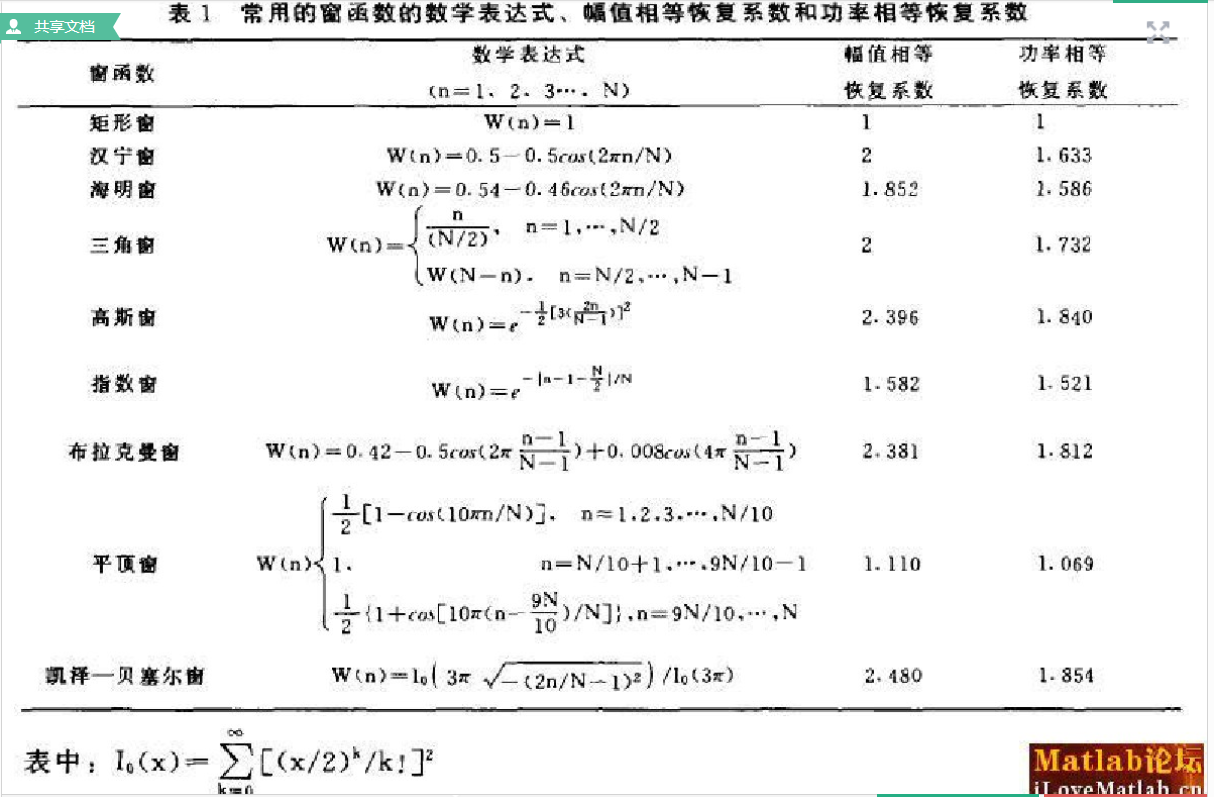

In [20]:
Image(filename='dft_pic/param.png')

And that's it for this document. 

### References

https://wiki.sieiot.com/pages/viewpage.action?pageId=8913417

Anything found online by googling DFT, window function, and similar concepts